<a href="https://colab.research.google.com/github/so02e/ML_python/blob/main/tf_keras_DNN_iris_SYJang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 from google.colab import drive

drive.mount('/content/gdrive')   # google drive를 google colab에 연결. 처음 실행 시, 인증 필요 

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers  #모듈(변수나 함수를 포함)만 불러오기

# iris 데이터를 읽어 들이고 정규화하기
dir = "/content/gdrive/My Drive/Colab Notebooks/AI/"
df = pd.read_csv(dir + "iris.csv")

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,iris_type
0,6.4,3.1,5.5,1.8,Iris-virginica
1,6.5,3.0,5.8,2.2,Iris-virginica
2,4.6,3.1,1.5,0.2,Iris-setosa
3,6.4,2.8,5.6,2.1,Iris-virginica
4,5.0,3.3,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,5.1,3.8,1.9,0.4,Iris-setosa
146,5.7,2.8,4.5,1.3,Iris-versicolor
147,6.9,3.1,5.4,2.1,Iris-virginica
148,7.2,3.0,5.8,1.6,Iris-virginica


In [5]:
print(df['iris_type'].unique())

['Iris-virginica' 'Iris-setosa' 'Iris-versicolor']


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
X = df.iloc[:,0:4]

# 레이블
bclass = {"Iris-virginica":[1,0,0], "Iris-setosa":[0,1,0], "Iris-versicolor":[0,0,1]}
y = np.empty((150,3))     # 150x3 크기의 다차원 벡터 생성
for i, v in enumerate(df["iris_type"]):
    y[i] = bclass[v]        #"sepal_length"이면, y[i]=[1,0,0] 와 같이 할당
    
# 훈련 전용 데이터와 테스트 전용 데이터로 나누기
X_train, y_train = X[0:100], y[0:100]
X_test,  y_test  = X[101:151], y[101:151]

In [150]:
# 모델 구조 정의하기
model = tf.keras.Sequential()  #순차적 계층화 준비
model.add(layers.Dense(64, input_shape=(4,)))  #입력 4개로부터 전달받는 64개 노드의 layer 생성
model.add(layers.Activation('relu'))  #ReLU 활성화함수 채택
model.add(layers.Dropout(0.2))        #dropout ratio=20% (배치 훈련시 20% arc 무시)


model.add(layers.Dense(32))         #16개 노드의 layer 생성
model.add(layers.Activation('relu')) #ReLU 활성화함수 채택
model.add(layers.Dropout(0.1))  #dropout ratio=10% (배치 훈련시 10% arc 무시)


model.add(layers.Dense(3))
model.add(layers.Activation('softmax')) #분류(classification)을 위해 softmax 함수 사용

# 모델 구축하기
model.compile(
    loss='categorical_crossentropy',  #다중 교차엔트로피
    optimizer="rmsprop",   #최적화 기법 중 하나
    metrics=['accuracy'])  #정확도 측정

In [151]:
# 데이터 훈련하기
hist = model.fit(
    X_train, y_train,
    batch_size=10, #10개에 한 번씩 업데이터 실행
    epochs=300, #훈련 데이터셋을 총 300회 반복 실험. 단, 조기중지될 수 있음
    validation_split=0.1,  
      #validation data 분할 비율. 즉, 150개 중에서 10%인 15개를 validation용으로 분할
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],  
      #'val_loss'를 monitor하여 감소하면 한 번 더(1) 참고 조기중지
    verbose=1)  #전 과정을 화면에 출력(1) 또는 미출력(0) 모드

# 테스트 데이터로 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/300
9/9 [==============================] - 1s 20ms/step - loss: 1.1388 - accuracy: 0.3667 - val_loss: 1.1116 - val_accuracy: 0.1000
Epoch 2/300
9/9 [==============================] - 0s 3ms/step - loss: 0.9988 - accuracy: 0.4778 - val_loss: 0.9785 - val_accuracy: 0.7000
Epoch 3/300
9/9 [==============================] - 0s 4ms/step - loss: 0.9834 - accuracy: 0.5333 - val_loss: 0.8238 - val_accuracy: 0.7000
Epoch 4/300
9/9 [==============================] - 0s 4ms/step - loss: 0.9188 - accuracy: 0.5778 - val_loss: 0.7847 - val_accuracy: 0.7000
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8907 - accuracy: 0.5889 - val_loss: 0.7650 - val_accuracy: 0.7000
Epoch 6/300
9/9 [==============================] - 0s 4ms/step - loss: 0.8210 - accuracy: 0.5556 - val_loss: 0.7041 - val_accuracy: 0.7000
Epoch 7/300
9/9 [==============================] - 0s 4ms/step - loss: 0.8013 - accuracy: 0.5667 - val_loss: 0.5863 - val_accuracy: 0.7000
Epoch 8/300
9/9 [=========

In [156]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

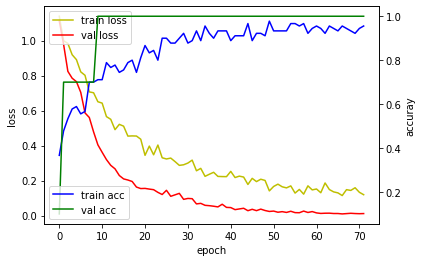

In [157]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [158]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 64)                320       
_________________________________________________________________
activation_35 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 32)                2080      
_________________________________________________________________
activation_36 (Activation)   (None, 32)                0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 3)               

In [159]:
model.get_weights()

[array([[-0.14364223, -0.09170078,  0.20662187,  0.06120177, -0.17792587,
          0.08446594,  0.15546623, -0.06156182,  0.06298817, -0.04801513,
         -0.22814031,  0.25975114,  0.25974292,  0.18507381,  0.11606517,
         -0.15730017, -0.0345535 ,  0.01606034, -0.17482403,  0.0631735 ,
          0.08057135,  0.0688    ,  0.02256304, -0.30598953,  0.03605801,
         -0.23490278, -0.11449122, -0.23421532,  0.12973721,  0.0874772 ,
          0.05354551,  0.01899162,  0.29698864, -0.13798812, -0.06364188,
         -0.10097924,  0.09643658, -0.23689193,  0.09288131,  0.06741929,
         -0.06151901,  0.13102931, -0.2699818 ,  0.02343902,  0.1824122 ,
         -0.14786683, -0.23454258, -0.10374556,  0.00739726,  0.03589683,
          0.17727678,  0.1520003 ,  0.18750675, -0.29703224,  0.20185754,
         -0.09837657,  0.20752585, -0.02390084, -0.24997559, -0.12361479,
          0.12883648,  0.29306912,  0.16372639,  0.09937178],
        [-0.23991117, -0.2651923 ,  0.23903784, -0

In [160]:
model.save(dir+"dnn_iris.h5")
print("Saved model to disk.")

#load and evaluate the saved model
from numpy import loadtxt
from tensorflow.python.keras.models import load_model

#load model
loaded_model = load_model(dir+"dnn_iris.h5")
model.summary()

score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Saved model to disk.
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 64)                320       
_________________________________________________________________
activation_35 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 32)                2080      
_________________________________________________________________
activation_36 (Activation)   (None, 32)                0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_37 (Dense)             (No

In [161]:
# X_test의 예측 클래스 확인하기
y_prob = model.predict(X_test)  # output node의 출력값 확인하기
print(y_prob)

y_class = y_prob.argmax(axis=-1)  # output node의 예측값(class) 확인하기
y_class

[[9.81357753e-01 2.29901964e-08 1.86421946e-02]
 [9.51393962e-01 3.57366190e-07 4.86057475e-02]
 [9.13904700e-03 6.23328052e-03 9.84627664e-01]
 [9.64121580e-01 3.11075006e-08 3.58783416e-02]
 [3.14289661e-09 9.99704659e-01 2.95279839e-04]
 [2.04665840e-09 9.99772727e-01 2.27311757e-04]
 [4.74362077e-11 9.99953985e-01 4.60340598e-05]
 [8.84346664e-01 2.43018076e-06 1.15650915e-01]
 [9.18929815e-01 5.46260310e-07 8.10695961e-02]
 [1.15339205e-01 1.65159494e-04 8.84495616e-01]
 [1.02999864e-09 9.99811232e-01 1.88807011e-04]
 [2.44697556e-02 8.51850957e-04 9.74678457e-01]
 [1.12457890e-10 9.99932528e-01 6.74770345e-05]
 [3.07105985e-02 1.40851131e-04 9.69148576e-01]
 [8.03623617e-01 9.79894139e-07 1.96375445e-01]
 [9.77223873e-01 2.44088881e-07 2.27759462e-02]
 [5.98061644e-03 1.23963389e-03 9.92779791e-01]
 [1.33400690e-02 1.04365894e-03 9.85616326e-01]
 [2.20279639e-09 9.99742687e-01 2.57250096e-04]
 [1.23006068e-08 9.99426126e-01 5.73924801e-04]
 [5.16862908e-09 9.99614358e-01 3.856652

array([0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 1, 1, 0,
       0, 0, 1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2,
       1, 2, 0, 0, 1])

In [169]:
# 새로운 샘플의 예측 클래스 확인하기
X_new = [5.7, 3.8, 1.7, 0.3]

print(X_new)

y_prob = model.predict([X_new])
y_pred = y_prob.argmax()
print(y_prob, y_pred)

[5.7, 3.8, 1.7, 0.3]
[[7.2277356e-10 9.9982733e-01 1.7267295e-04]] 1
